<a href="https://colab.research.google.com/github/ericaerin/GE120/blob/main/Lecture7_Basic_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Basic Data Visualization

Notebook version of [Python Seaborn Tutorial by EliteDataScience.com](https://elitedatascience.com/python-seaborn-tutorial)

Data provided: [Pokemon.csv](https://elitedatascience.com/wp-content/uploads/2022/07/Pokemon.csv)

In [ ]:
#Download the data from the link above (EliteDataScience.com)
from google.colab import files
files.upload() #upload Pokemon.csv - contains the first generation pokemon with stats

In [ ]:
#import all modules needed; alias below are commonly used alias for these modules
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin') # Read dataset
df.head() # Display first observations to see what the data looks like

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


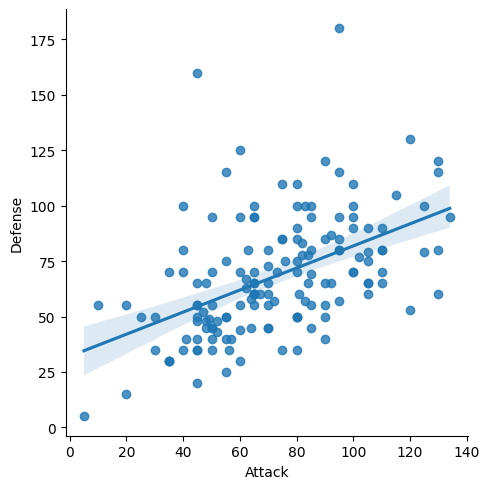

In [ ]:
#Create a scatter plot using seaborn
sns.lmplot(x='Attack', y='Defense', data=df)

#this actually ceates a linear model plot and not just a scatter plot
#so we'll have to customize further to remove the regression line

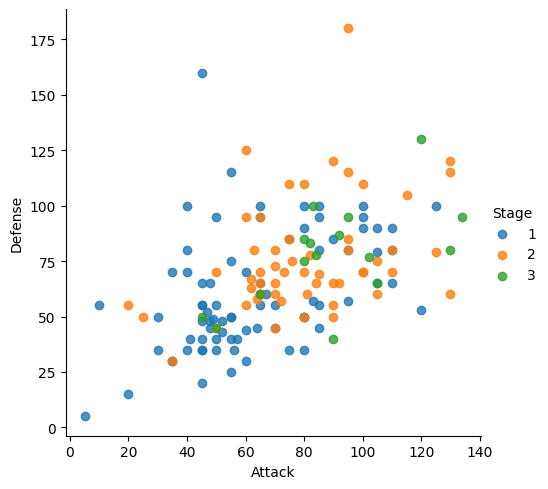

In [ ]:
#Revised linear model plot to remove linear fit line and group points
#by the column, 'Stage'
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

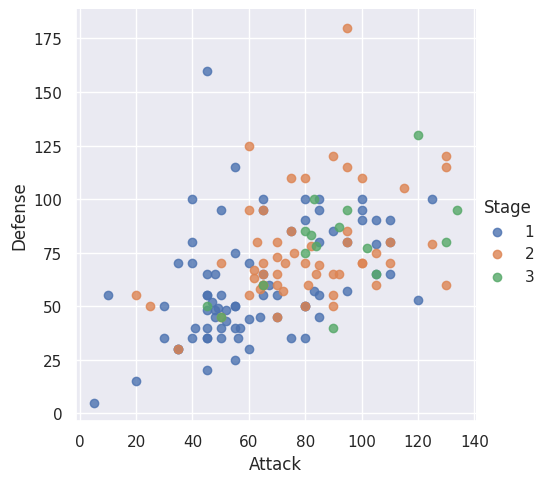

In [ ]:
sns.set_theme(style='darkgrid')
#has many parameters but commonly edits style for general theme
#changeto {darkgrid, whitegrid, dark, white, ticks}

sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

(0.0, 160.0)

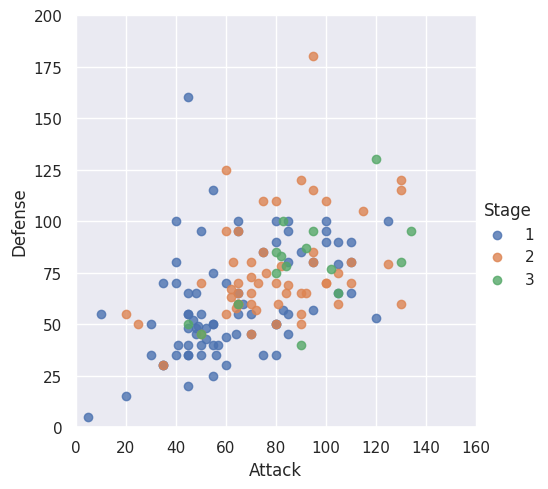

In [ ]:
#Use matplotlib to customize the plots
#Link provided: https://matplotlib.org/stable/tutorials/introductory/pyplot.html
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False,
           hue='Stage')

plt.ylim(0, 200) #set y-axis to 0-200
plt.xlim(0, 160) #set x-axis to 0-160

#notice that once you set the sns theme of the colab notebook, it
#carries to the other plots TO BE created

<Axes: >

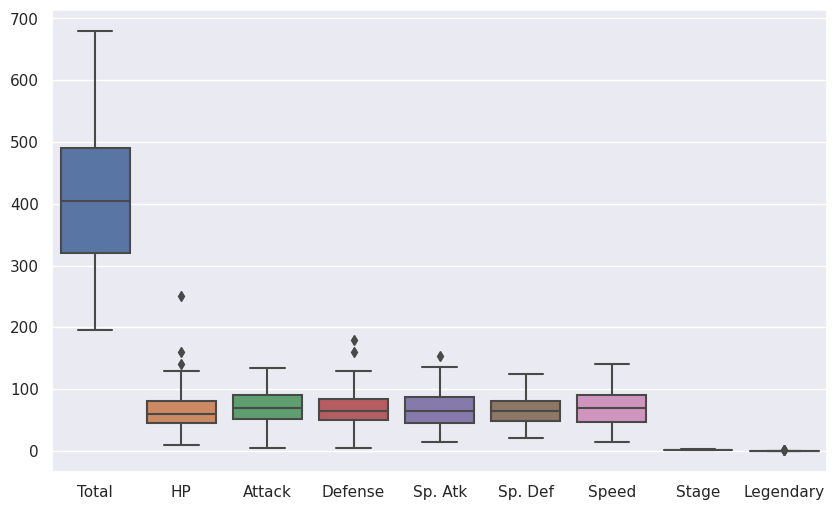

In [ ]:
plt.figure(figsize=(10,6)) # Set plot dimensions: figsize=(width,height)
sns.boxplot(data=df) #create a boxplot which will use the figure size above

<Axes: >

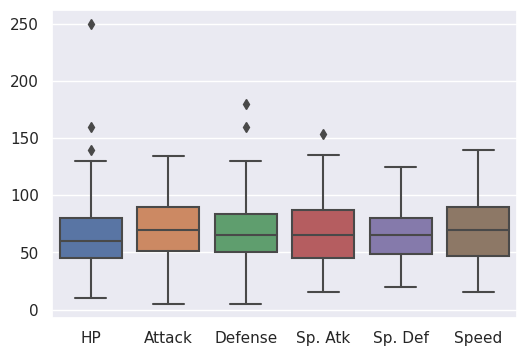

In [ ]:
#checking the boxplot, there are unnecessary statistics shown like the Total, Stage, and Legendary
#since they are not a distribution of numbers. It will be easier to process these changes in the dataframe before plotting.

#Pre-process DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1) #removes the columns specified

#New boxplot using stats_df
plt.figure(figsize=(6,4))
sns.boxplot(data=stats_df)

#Link provided for pandas cheat sheet: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

<Axes: xlabel='Type 1', ylabel='Attack'>

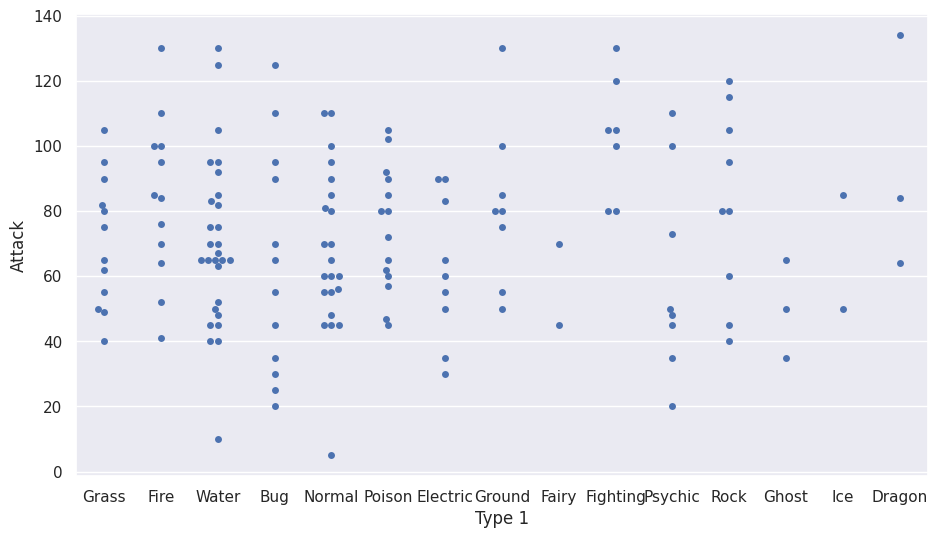

In [ ]:
plt.figure(figsize=(11,6))
sns.swarmplot(x='Type 1', y='Attack', data=df) #create a swarmplot - show distribution of each x type based on y values using points

<Axes: xlabel='Type 1', ylabel='Attack'>

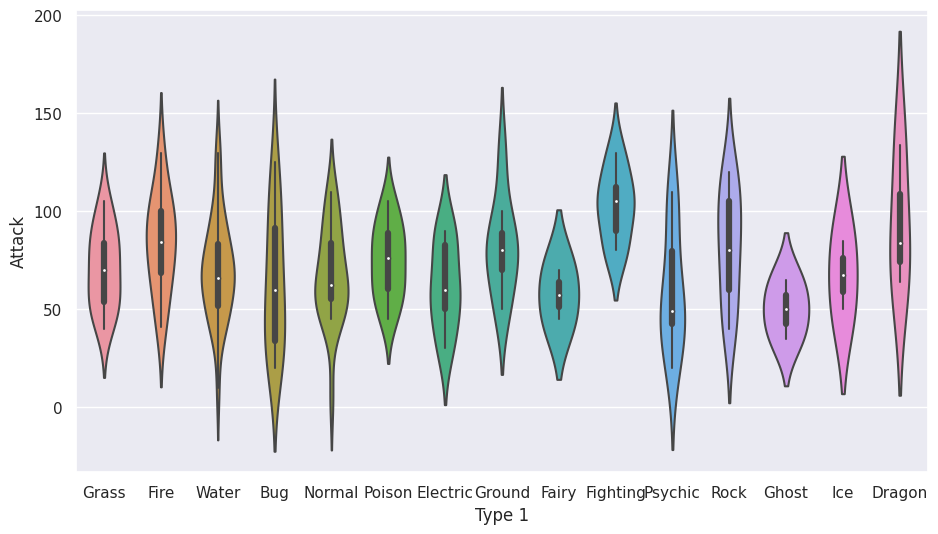

In [ ]:
plt.figure(figsize=(11,6)) # Set plot dimensions
sns.violinplot(x='Type 1', y='Attack', data=df) #use violin plot to show the "summary" of distribution of points (see swarmplot)

Text(0.5, 1.0, 'Attack by Type')

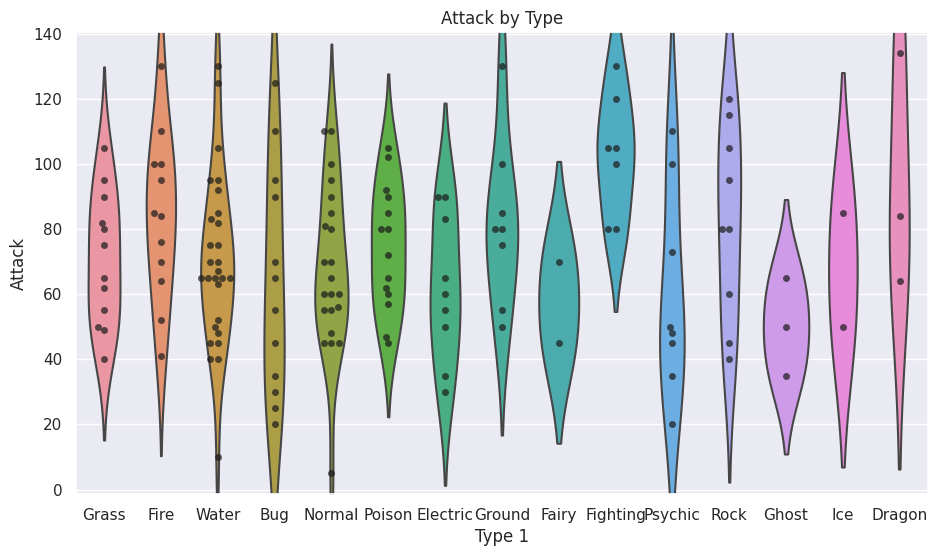

In [ ]:
#Overlaying plots

# Set figure size with matplotlib
plt.figure(figsize=(11,6))

# Create the plots
sns.violinplot(x='Type 1',
               y='Attack',
               data=df,
               inner=None) # Remove the bars inside the violins

sns.swarmplot(x='Type 1',
              y='Attack',
              data=df,
              color='k', # Make points black
              alpha=0.7) # and slightly transparent

# Set title with matplotlib
plt.title('Attack by Type')

<ipython-input-37-0c4694aa0698>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = stats_df.corr() #Calculate correlations


<Axes: >

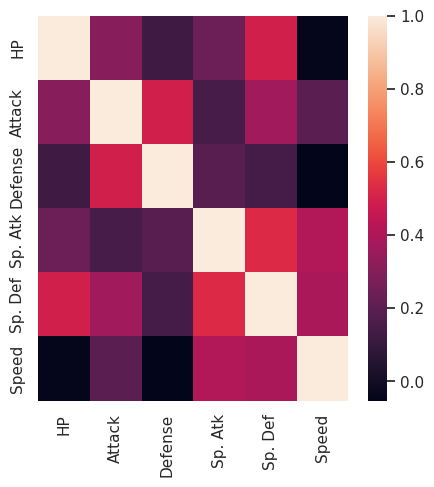

In [ ]:
#Heatmap

corr = stats_df.corr() #Calculate correlations

#Heatmap
plt.figure(figsize=(5,5))
sns.heatmap(corr)

<Axes: xlabel='Attack', ylabel='Count'>

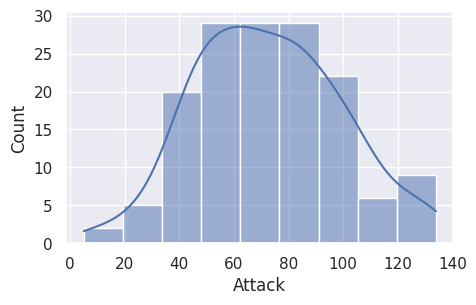

In [ ]:
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(5,3))
sns.histplot(df, x='Attack',
             kde=True) # Plot the density curve too
#kde-kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon')])

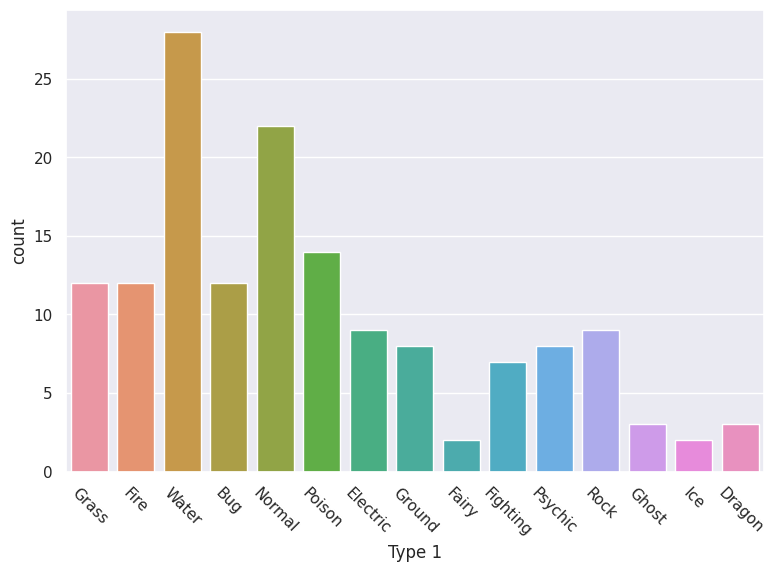

In [ ]:
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=(9,6))
sns.countplot(x='Type 1', data=df)

# Rotate x-labels
plt.xticks(rotation=-45)

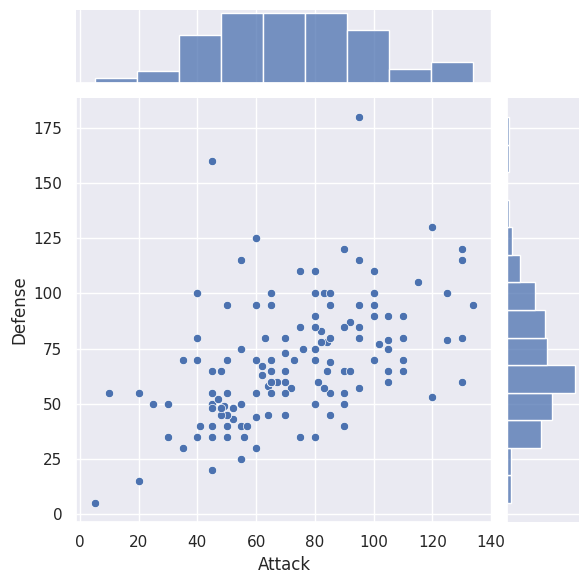

In [ ]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)

<Axes: xlabel='Attack', ylabel='Defense'>

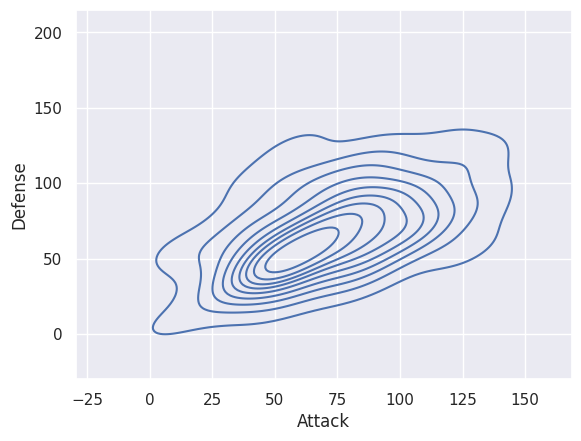

In [ ]:
# Density Plot
sns.kdeplot(x='Attack', y='Defense', data=df)

#### Spatio-Temporal


Source: https://medium.com/@samvardhanvishnoi2026/spatio-temporal-data-visualization-my-top-3-techniques-by-experience-4b92113b97ea